# Visualizations of the antennas. 

This includes the antenna beam pattern, the trajectory and the projection of the beam pattern on the sky. 

In [43]:
import numpy as np
import pandas as pd
import copy
import os

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from power_to_temperature import *
from Tgsm import*

Cmap = copy.copy(cm.get_cmap("jet"))
Cmap.set_under("w")
%matplotlib inline

impath = 'images/'

## Simulated mock antenna pattern

In [52]:
antenna = 'biscus'

F = 70
Data = pd.read_hdf('mock_pattern_'+antenna+'/0%dMHz.hdf5'%F)
theta,phi = np.radians(Data.values[:,0]),np.radians(Data.values[:,1])
dB = Data.values[:,2]
X,Y,Z=np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)
Temp = Radio_source_trans(dB,F,1e6)

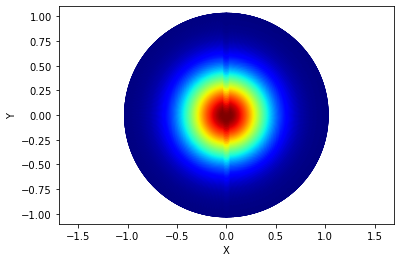

In [53]:
plt.scatter(X, Y, c=Temp, cmap=cm.jet,vmin=0)
m = cm.ScalarMappable(cmap=cm.jet)
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
#plt.savefig(impath+'real_pattern.png')
plt.show()

Pattern visualization on the sky: 

In [54]:
dates =  ['2018-06-14 00:00:00','2018-06-15 00:00:00']
T = Time(dates)
dt = T[1]-T[0]
times = T[0] + dt*np.linspace(0.,1.,300)
l_gal,b_gal = trajectory(times)

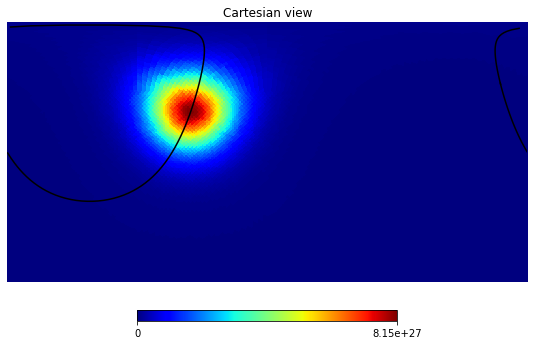

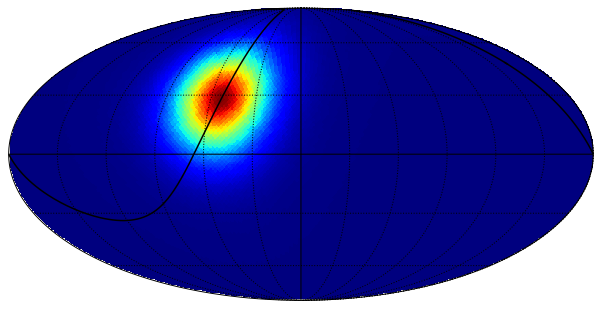

In [55]:
t0 = Time('2013-06-14 08:00:00')
# Getting the pattern 
l,b,Temp = pattern(time = t0,Freq=70,PATH='mock_pattern_'+antenna+'/')
    
# Projecting the pattern into pixels.
nside = 32
pix = hp.ang2pix(nside,l, b, lonlat=True)

# Filling the pixels with the temperature data.
bmap_pat = np.zeros(hp.nside2npix(nside))
bmap_pat[pix] = Temp
    
# Cartesian visualization.
hp.cartview(bmap_pat,cmap=Cmap)
hp.projplot(l_gal, b_gal,'-k',lonlat=True)
#plt.savefig('Imagenes/'+str(t0+i*dt)+'_cartview_gal.png')
plt.show()
    
#Mollweide visualization 
hp.mollview(bmap_pat,cmap=Cmap,cbar=False,title='')
hp.projplot(l_gal, b_gal,'-k',lonlat=True)
hp.graticule()
#plt.savefig(impath+str(t0+i*dt)+'_mollview_gal.png')
plt.show()